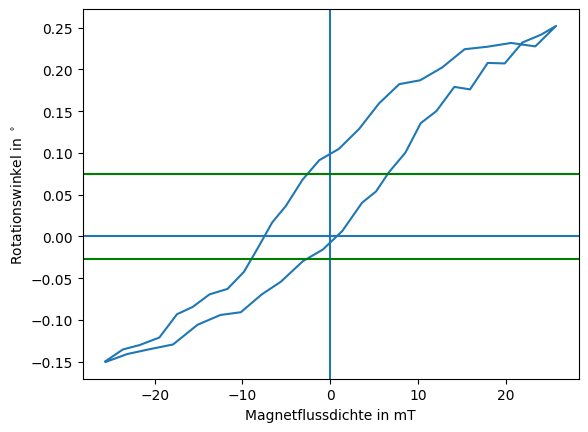

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import csv


def sin(x,a,p,w,o):

    return a*np.sin(w*x+p) +o

def phase():
    winkel = np.deg2rad(np.arange(0,185,5))
    intensity = [0.36,0.29,0.22,0.17,0.12,0.07,0.05,0.03,0.03,0.04,0.06,0.09,0.13,0.18,0.23,0.3,0.37,0.42,0.49,0.53,0.66,0.68,0.71,0.81,0.78,0.83,0.83,0.84,0.83,0.8,0.76,0.71,0.65,0.58,0.51,0.45,0.38]
    intensity_neu = [0.21,0.16,0.1,0.06,0.03,0.014,0.01,0.017,0.04,0.07,0.12,0.18,0.24,0.32,0.4,0.47,0.55,0.6,0.66,0.67,0.8,0.84,0.8,0.9,0.85,0.85,0.82,0.77,0.78,0.7,0.63,0.58,0.51,0.43,0.35,0.29,0.22]

    fit1, err1 = curve_fit(sin,winkel,intensity)
    fit2, err2 = curve_fit(sin,winkel,intensity_neu)
    print(np.sqrt(err1[3][3]))
    print(str(np.rad2deg(fit2[1]-fit1[1]))+' +- '+str(np.sqrt(err1[3][3])+np.sqrt(err2[3][3])))
    plt.plot(winkel,sin(winkel,fit1[0],fit1[1],fit1[2],fit1[3]),label = 'Fit')
    plt.plot(winkel,sin(winkel,fit2[0],fit2[1],fit2[2],fit2[3]),label='Fit')
    plt.plot(winkel,intensity,'+',label='Daten')
    plt.plot(winkel,intensity_neu,'+',label='Daten')
    plt.legend()


def hysterese():

    files = open('./230619_MOKE/4.txt')
    data = csv.reader(files,delimiter='\t')
    magn =[]
    angle =[]
    i = 0
    for line in data:
        i+=1
        if i>13:
            magn.append(float(line[0].split()[1]))
            angle.append(float(line[0].split()[2]))
    plt.plot(magn,angle)
    plt.axhline(y=0)
    plt.axvline(x=0)
    plt.axhline(y=0.075,color='green')
    plt.axhline(y=-0.027,color='green')
    plt.xlabel('Magnetflussdichte in mT')
    plt.ylabel(r'Rotationswinkel in $^\circ$')
hysterese()
